In [17]:
# Complete Penguin Classification with User Input and Pickle Save/Load

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [18]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [19]:
# Drop rows with missing target 'species'
df = df.dropna(subset=['species'])

In [20]:
# Numerical columns to impute and scale
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Impute missing numerical values with mean
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])


In [21]:

# Encode categorical variables
le_species = LabelEncoder()
le_island = LabelEncoder()
le_sex = LabelEncoder()

df['species'] = le_species.fit_transform(df['species'])
df['island'] = le_island.fit_transform(df['island'])
df['sex'] = le_sex.fit_transform(df['sex'].fillna('Unknown'))


In [22]:
# Prepare features and target
X = df.drop(columns=['species'])
y = df['species']

# Scale numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [23]:
# Step 2: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
#  Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.2%}")


Logistic Regression Accuracy: 98.55%
Decision Tree Accuracy: 95.65%
Random Forest Accuracy: 98.55%


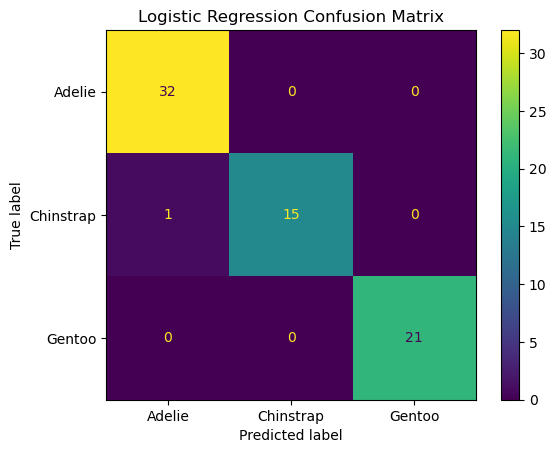

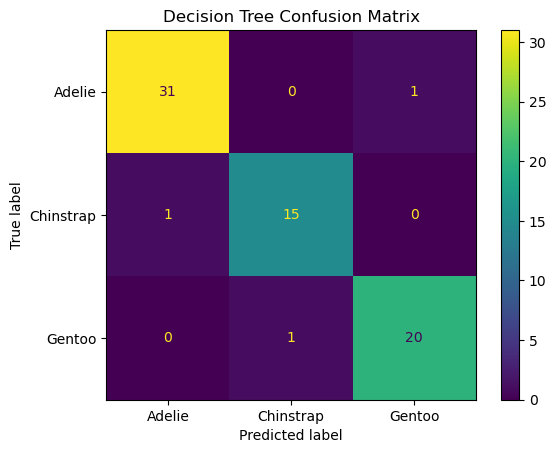

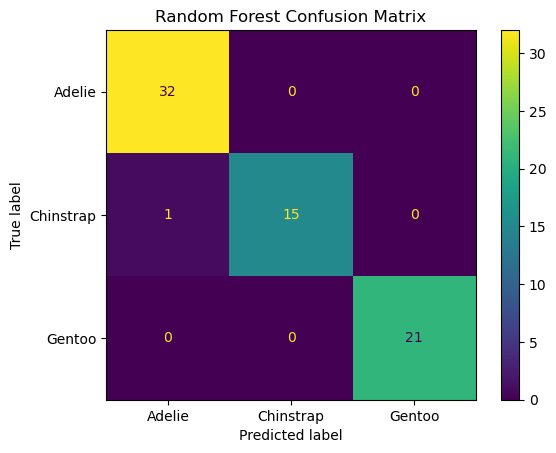

In [25]:
# Show confusion matrices
for name, model in models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_species.classes_).plot(cmap="viridis")
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [26]:
# Step 4: Select best model and save all preprocessors
# -----------------------------
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f"\n✅ Best model selected: {best_model_name} with accuracy {accuracies[best_model_name]:.2%}")

# Save model, scaler, encoders, numerical columns, and feature order
with open("penguin_classifier.pkl", "wb") as f:
    pickle.dump({
        'model': best_model,
        'scaler': scaler,
        'label_encoders': {
            'species': le_species,
            'island': le_island,
            'sex': le_sex
        },
        'num_cols': num_cols,
        'feature_names': X.columns.tolist()
    }, f)

print("📦 Model and preprocessors saved to 'penguin_classifier.pkl'.")



✅ Best model selected: Logistic Regression with accuracy 98.55%
📦 Model and preprocessors saved to 'penguin_classifier.pkl'.


In [ ]:
# Step 5: User Input & Prediction
# -----------------------------
# -----------------------------
print("\n🔍 Enter Penguin Features to Predict Species:")

# Load saved pickle (in real use case, you may do this in a separate script)
with open("penguin_classifier.pkl", "rb") as f:
    data = pickle.load(f)

model = data['model']
scaler = data['scaler']
le_species = data['label_encoders']['species']
le_island = data['label_encoders']['island']
le_sex = data['label_encoders']['sex']
num_cols = data['num_cols']
feature_names = data['feature_names']

try:
    user_data = {
        'bill_length_mm': float(input("Bill Length (mm): ")),
        'bill_depth_mm': float(input("Bill Depth (mm): ")),
        'flipper_length_mm': float(input("Flipper Length (mm): ")),
        'body_mass_g': float(input("Body Mass (g): ")),
        'island': input("Island (Biscoe, Dream, Torgersen): "),
        'sex': input("Sex (Male, Female, Unknown): ")
    }

    # Encode categorical features
    user_data['island'] = le_island.transform([user_data['island']])[0]
    user_data['sex'] = le_sex.transform([user_data['sex']])[0]

except ValueError as e:
    print(f"❌ Input Error: {e}")
    print(f"Please enter valid categories for island: {list(le_island.classes_)}")
    print(f"and sex: {list(le_sex.classes_)}")
    exit()
# Create dataframe and scale numeric columns
user_df = pd.DataFrame([user_data])
user_df[num_cols] = scaler.transform(user_df[num_cols])

# Ensure correct column order
user_df = user_df[feature_names]

# Predict species
pred_code = model.predict(user_df)[0]
pred_species = le_species.inverse_transform([pred_code])[0]

print(f"\n✅ Predicted Penguin Species: {pred_species}")



🔍 Enter Penguin Features to Predict Species:


Bill Length (mm):  97
Bill Depth (mm):  89
Flipper Length (mm):  67
Body Mass (g):  98
Island (Biscoe, Dream, Torgersen):  Biscoe
